<a href="https://colab.research.google.com/github/mchivuku/CSCI-B657-CV-Labs/blob/master/Computer_Vision_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid Image in FFT**

What to do
Write a Python program to do the following:
1. Given 2 images A and B, your program should convert them to grayscale.
2. Perform FFT on A and B, and save the results as image files (see Module 5.9).
3. Apply a low-pass filter on image A, a high-pass filter on image B, and perform pixel-wise summation.
4. Perform inverse Fourier transform on the result from step 3 and save the output to an image file.
Run your program on 2 sample images of your choice, and then swap them, to produce 2 different hybrid
images.

In [0]:
import numpy as np
import imageio
from PIL import Image, ImageOps, ImageDraw
import matplotlib.pyplot as plt
import scipy.fftpack as F2

from matplotlib.colors import LogNorm

%matplotlib inline

plt.style.use("fivethirtyeight")

  

In [3]:
## Mount google drive

from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
%cd /content/drive/My\ Drive/Masters-DS/Computer-Vision/labs/lab2

/content/drive/My Drive/Masters-DS/Computer-Vision/labs/lab2


In [0]:
## Helper functions - read image, perform FFT
"""
Read image and convert to grayscale
"""
def read_image(file):
  image = Image.open(file)
  image = ImageOps.grayscale(image)
  return image

"""
Show image
"""
def show_image(image):
  plt.imshow(np.array(image).astype(np.uint8),cmap="gray")
  plt.show()
  
  
"""
Perform FFT of the image
"""
def fft(image):
  return F2.fftshift(F2.fft2(image))

"""
Function to plot FFT of the image
"""
def plot_spectogram(freq):
  plt.imshow(np.abs(fft))
  plt.show()
  
  
"""
Plot, amplitude and phase of the image
"""
def plot_amplitude_phase(image,fft_out,phase):
  plt.subplot2grid((1,2),(0,0))
  plt.imshow(image,cmap="gray")
  
  ## amplitude spectrum
  N, M = fft_out.shape
  plt.subplot2grid((2,2),(0,1))
  plt.imshow(np.log(1+fft_out),cmap="viridis",extent=(-N//2,N//2, -M//2,M//2))
  plt.title("Amplitude Spectrum")
  
  ## phase spectrum
  plt.subplot2grid((2,2),(1,1))
  plt.contourf(phase)
  plt.title("Phase Spectrum")
  
  plt.tight_layout()
  
  
"""
Save fft of the image
"""
def save_fft_image(fft_out,filename):
  # compute the norm
  fft_norm = np.log(abs(fft_out)) * 255 / np.amax(np.log(abs(fft_out))).astype(np.uint8)
  imageio.imsave(filename,fft_norm)
  
  
"""
save inverse fft
"""
def save_inverse_fft(ifft2,filename="fft-then-ifft.png"):
  imageio.imsave(filename,ifft2.astype(np.uint8))
  
  
"""
function to perform inverse fft
"""
def inverse_fft(fftout):
  ifft2 = abs(F2.ifft2(F2.ifftshift(fftout)))
  return ifft2

In [0]:
image1  = read_image("cat.png")
image2 = read_image("picture2.png")

image1 = np.array(image1)
image2 = np.array(image2)
## clip image1
image1 = image1[:image2.shape[0],:image2.shape[1]]

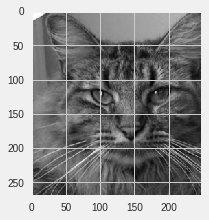

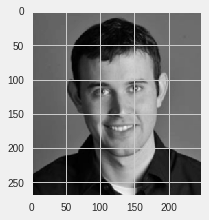

In [126]:
plt.subplot(1,2,1)
show_image(image1)
plt.subplot(1,2,2)
show_image(image2)



In [0]:
fft1 = fft(image1)
fft2 = fft(image2)



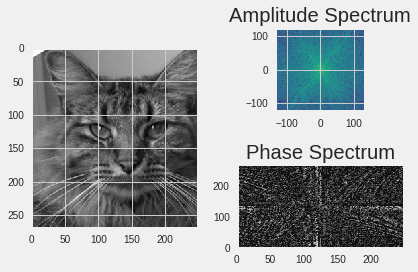

In [128]:
amplitude_phase = lambda x : (np.abs(x), np.angle(x))

image1_mag, image1_phase = amplitude_phase(fft1)
plot_amplitude_phase(image1, image1_mag, image1_phase)
save_fft_image(fft1,"fft1.png")  


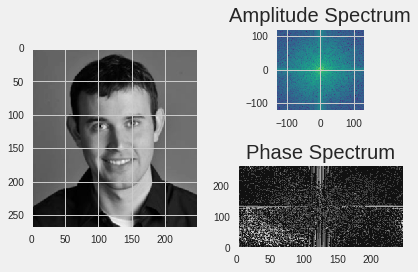

In [129]:
image2_mag, image2_phase = amplitude_phase(fft2)
plot_amplitude_phase(image2, image2_mag, image2_phase)
save_fft_image(fft2,"fft2.png")  


In [0]:
## Gaussian Low pass filter
from scipy import stats

def gaussian_low_pass(image):
  width = 0.1
  lims = np.shape(image)
  xr = stats.zscore(np.arange(lims[0]))
  yr = stats.zscore(np.arange(lims[1]))
  [y,x] = np.meshgrid(yr,xr)
  
  gaus2d = np.exp(-(x**2 + y**2) / (2*width**2))
  return gaus2d


def gaussian_high_pass(image):
  width = 0.5
  lims = np.shape(image)
  xr = stats.zscore(np.arange(lims[0]))
  yr = stats.zscore(np.arange(lims[1]))
  [y,x] = np.meshgrid(yr,xr)
  gaus2d = np.exp(-(x**2 + y**2) / (2*width**2))
  # high pass: 1- lowpass
  high_pass = 1-gaus2d
  return high_pass

(270, 249)

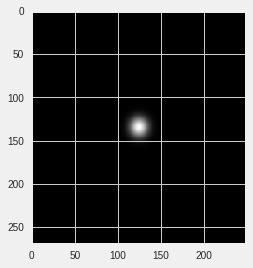

In [146]:
image1 = np.array(image1)
low_pass = gaussian_low_pass(fft1)
plt.imshow(low_pass,plt.cm.gray)
low_pass.shape

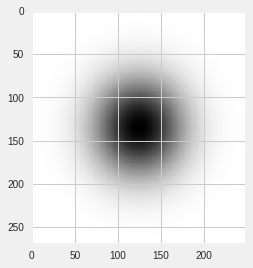

In [147]:
image2 = np.array(image2)

high_pass = gaussian_high_pass(image2)
plt.imshow(high_pass,plt.cm.gray)

In [0]:
## Apply a low-pass filter on image A, a high-pass filter on image B, and perform pixel-wise summation.

fft_imageA  = np.multiply(fft1 , low_pass)
fft_imageB =  np.multiply(fft2, high_pass)

pixel_sum = np.add(fft_imageA,fft_imageB)


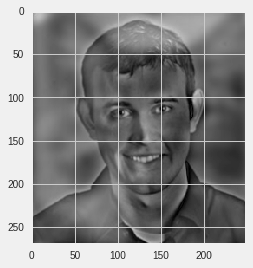

In [140]:
## ifft
ifft_inverse = inverse_fft(pixel_sum)
show_image(ifft_inverse)

In [0]:
## save image
save_inverse_fft(ifft_inverse)

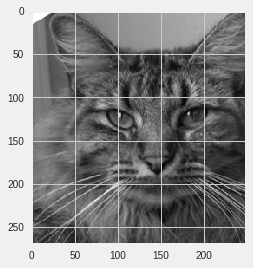

In [142]:
## Swap the image to produce different output

# Apply High pass on image1


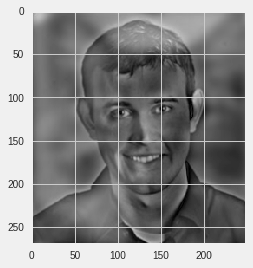

In [148]:
fft_imageA_swap  = np.multiply(fft1 , high_pass)
fft_imageB_swap =  np.multiply(fft2, low_pass)

pixel_sum_swap = np.add(fft_imageA,fft_imageB)
## ifft
ifft_inverse_swap = inverse_fft(pixel_sum_swap)
show_image(ifft_inverse_swap)

In [0]:
save_inverse_fft(ifft_inverse_swap,"fft-then-ifft_swap.png")